In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Assignment 7 – EDA

## Import the attached CSV files (IPL_Dataset.csv) and answer the following questions:

## Q1. What is the maximum number of matches played by an individual player in a season? Print the player name along with the number of matched played.



In [2]:
df=pd.read_csv("ipl_dataset.csv")
df

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,Khaleel Ahmed,7,1,0,0,0*,0.00,2,0.00,0,0,0,0
129,130,Arshdeep Singh,8,1,0,0,0*,0.00,3,0.00,0,0,0,0
130,131,Daniel Sams,3,1,0,0,0*,0.00,2,0.00,0,0,0,0
131,132,Shreevats Goswami,2,2,0,0,0*,0.00,4,0.00,0,0,0,0


In [3]:
df.head()

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30


In [4]:
max_matches=df["Matches"].max()
max_matches

17

In [5]:
df.loc[df["Matches"]==max_matches,["Player","Matches"]]

,Player,Matches
1,Shikhar Dhawan,17
3,Shreyas Iyer,17
19,Marcus Stoinis,17
67,Kagiso Rabada,17


## Q2. Top 2 players with maximum Average who have scored atleast 2 half centuries ?



In [6]:
half=df[df["50"]>=2]
half[["Player","Avg","Matches"]].sort_values(by="Avg",ascending=False).reset_index().head(2)

,index,Player,Avg,Matches
0,36,Wriddhiman Saha,71.33,4
1,4,Ishan Kishan,57.33,14


In [7]:
half=df["50"]>=2
df.loc[half,["Player","Avg","Matches"]].sort_values(by="Avg",ascending=False).reset_index().head(2)

,index,Player,Avg,Matches
0,36,Wriddhiman Saha,71.33,4
1,4,Ishan Kishan,57.33,14


## Q3. Create 2 new columns based on Player name. First column will have first name and second column will have last name. Eg: for the player Shikhar Dhawan, Shikhar will be the first name and Dhawan will be the last name.

In [8]:
df["First_name"]=df["Player"].str.split(" ",n=1).str[0]
df["Last_name"]=df["Player"].str.split(" ",n=1).str[1]
df

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,100,50,4s,6s,First_name,Last_name
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23,KL,Rahul
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12,Shikhar,Dhawan
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14,David,Warner
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16,Shreyas,Iyer
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,Ishan,Kishan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,Khaleel Ahmed,7,1,0,0,0*,0.00,2,0.00,0,0,0,0,Khaleel,Ahmed
129,130,Arshdeep Singh,8,1,0,0,0*,0.00,3,0.00,0,0,0,0,Arshdeep,Singh
130,131,Daniel Sams,3,1,0,0,0*,0.00,2,0.00,0,0,0,0,Daniel,Sams
131,132,Shreevats Goswami,2,2,0,0,0*,0.00,4,0.00,0,0,0,0,Shreevats,Goswami


## Q4. Create a new column (Cleaned_Highest_score) based on Highest score variable. Remove the Asterik(*) mark and convert the data type into INT.



In [9]:
df["cleaned_HS"]=df["Highest Score"].str.replace("*","")
df["cleaned_HS"]=df["cleaned_HS"].astype(int)
df

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,100,50,4s,6s,First_name,Last_name,cleaned_HS
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23,KL,Rahul,132
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12,Shikhar,Dhawan,106
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14,David,Warner,85
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16,Shreyas,Iyer,88
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,Ishan,Kishan,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,Khaleel Ahmed,7,1,0,0,0*,0.00,2,0.00,0,0,0,0,Khaleel,Ahmed,0
129,130,Arshdeep Singh,8,1,0,0,0*,0.00,3,0.00,0,0,0,0,Arshdeep,Singh,0
130,131,Daniel Sams,3,1,0,0,0*,0.00,2,0.00,0,0,0,0,Daniel,Sams,0
131,132,Shreevats Goswami,2,2,0,0,0*,0.00,4,0.00,0,0,0,0,Shreevats,Goswami,0


In [10]:
df.dtypes

Jersey No          int64
Player            object
Matches            int64
Inns               int64
Not Out            int64
Runs               int64
Highest Score     object
Avg              float64
Balls faced        int64
Strike rate      float64
100                int64
50                 int64
4s                 int64
6s                 int64
First_name        object
Last_name         object
cleaned_HS         int32
dtype: object

## Q5. Print the total number of centuries scored in the entire season.


In [11]:
a=df["100"].sum()
print("Total no.of centuries scored in the entire season:",a)

Total no.of centuries scored in the entire season: 5


## Q6. Print all the player names whose strike rate is less than the average strike rate of all players in entire season. Print the player name, his strike rate and average strike rate.

In [12]:
avg_strike=df["Strike rate"].mean().round(2)
avg_strike

107.36

In [13]:
print("Average strike rate of all players in entire season:",avg_strike)
df.loc[df["Strike rate"]<avg_strike,["Player","Strike rate","Avg"]]

Average strike rate of all players in entire season: 107.36


,Player,Strike rate,Avg
51,Ajinkya Rahane,105.60,14.12
55,Glenn Maxwell,101.88,15.42
58,Vijay Shankar,101.04,24.25
61,Josh Philippe,101.29,19.50
62,Gurkeerat Singh,88.75,0.00
65,Kedar Jadhav,93.93,20.66
70,Yashasvi Jaiswal,90.90,13.33
71,Shreyas Gopal,94.87,9.25
77,Murali Vijay,74.41,10.66
79,Chris Jordan,93.54,9.66


## Q7. Please check the correlation between the features and create a heat map.


In [14]:
num= [i for i in df.columns if df[i].dtypes!=object]
num

['Jersey No',
 'Matches',
 'Inns',
 'Not Out',
 'Runs',
 'Avg',
 'Balls faced',
 'Strike rate',
 '100',
 '50',
 '4s',
 '6s',
 'cleaned_HS']

In [15]:
numeric=df[num]
numeric

,Jersey No,Matches,Inns,Not Out,Runs,Avg,Balls faced,Strike rate,100,50,4s,6s,cleaned_HS
0,1,14,14,2,670,55.83,518,129.34,1,5,58,23,132
1,2,17,17,3,618,44.14,427,144.73,2,4,67,12,106
2,3,16,16,2,548,39.14,407,134.64,0,4,52,14,85
3,4,17,17,2,519,34.60,421,123.27,0,3,40,16,88
4,5,14,13,4,516,57.33,354,145.76,0,4,36,30,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,7,1,0,0,0.00,2,0.00,0,0,0,0,0
129,130,8,1,0,0,0.00,3,0.00,0,0,0,0,0
130,131,3,1,0,0,0.00,2,0.00,0,0,0,0,0
131,132,2,2,0,0,0.00,4,0.00,0,0,0,0,0


In [16]:
numeric.corr()

,Jersey No,Matches,Inns,Not Out,Runs,Avg,Balls faced,Strike rate,100,50,4s,6s,cleaned_HS
Jersey No,1.000000,-0.556695,-0.916174,-0.386247,-0.896664,-0.746510,-0.891969,-0.730489,-0.248353,-0.769577,-0.846965,-0.808756,-0.926906
Matches,-0.556695,1.000000,0.728358,0.555261,0.565237,0.306128,0.555102,0.371328,0.128405,0.455437,0.522628,0.523367,0.456171
Inns,-0.916174,0.728358,1.000000,0.464356,0.895914,0.585148,0.889753,0.581468,0.224328,0.755027,0.846749,0.810922,0.832002
Not Out,-0.386247,0.555261,0.464356,1.000000,0.308747,0.429888,0.271021,0.415060,0.019726,0.174184,0.204779,0.391472,0.235613
Runs,-0.896664,0.565237,0.895914,0.308747,1.000000,0.687475,0.989948,0.517678,0.382577,0.912264,0.959576,0.861166,0.913250
Avg,-0.746510,0.306128,0.585148,0.429888,0.687475,1.000000,0.664173,0.591306,0.233726,0.638326,0.623643,0.646224,0.774646
Balls faced,-0.891969,0.555102,0.889753,0.271021,0.989948,0.664173,1.000000,0.474226,0.358550,0.900547,0.955994,0.810916,0.904798
Strike rate,-0.730489,0.371328,0.581468,0.415060,0.517678,0.591306,0.474226,1.000000,0.135331,0.406029,0.465132,0.566317,0.608398
100,-0.248353,0.128405,0.224328,0.019726,0.382577,0.233726,0.358550,0.135331,1.000000,0.292812,0.456622,0.186767,0.383540
50,-0.769577,0.455437,0.755027,0.174184,0.912264,0.638326,0.900547,0.406029,0.292812,1.000000,0.892025,0.757501,0.841283


<Axes: >

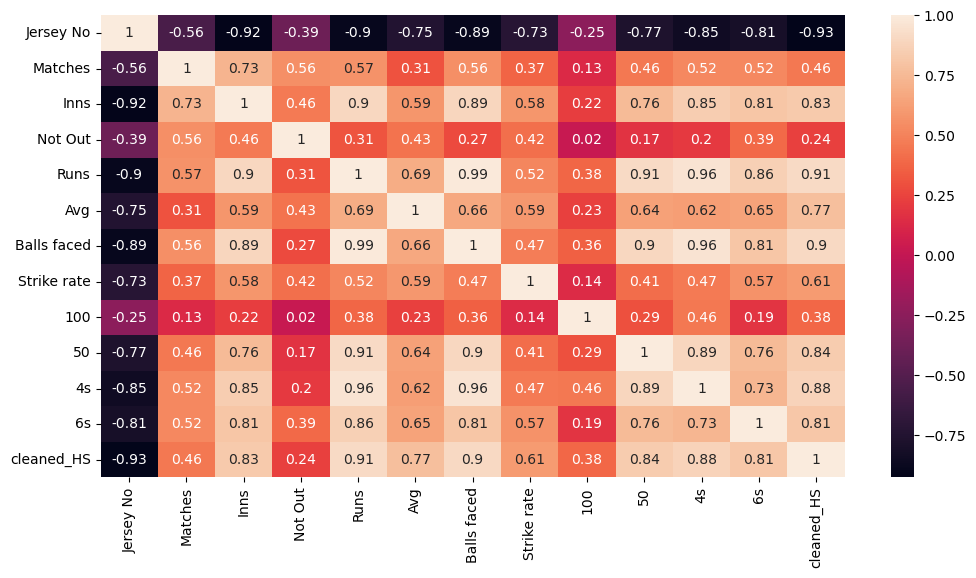

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(numeric.corr(),annot=True,cbar="OrRd")

## Q8. Check the list of players who has an average greater than 50 as well strike rate above 120. Print player name, average and strike rate.

In [18]:
play_avg=df[(df["Avg"]>50) & (df["Strike rate"]>120)]
play_avg[["Player","Avg","Strike rate"]]

,Player,Avg,Strike rate
0,KL Rahul,55.83,129.34
4,Ishan Kishan,57.33,145.76
31,Kieron Pollard,53.60,191.42
36,Wriddhiman Saha,71.33,139.86
37,Ruturaj Gaikwad,51.00,120.71
57,Deepak Hooda,101.00,142.25
60,Tom Curran,83.00,133.87


## Q9. Please check the list of players who has an average greater than 40 and balls faced above 100. Print player name, average and balls faced.



In [19]:
avg_ball=df[(df["Avg"]>40) & (df["Balls faced"]>100)]
avg_ball[["Player","Avg","Balls faced"]]

,Player,Avg,Balls faced
0,KL Rahul,55.83,518
1,Shikhar Dhawan,44.14,427
4,Ishan Kishan,57.33,354
8,Virat Kohli,42.36,384
9,ABD Villiers,45.40,286
10,Faf Duplessis,40.81,319
14,Eoin Morgan,41.80,302
24,Kane Williamson,45.28,237
27,Chris Gayle,41.14,210
28,Ben Stokes,40.71,200


## Q10. Players who scored atleast one century in this season. Create visualization.




<Axes: xlabel='100', ylabel='Player'>

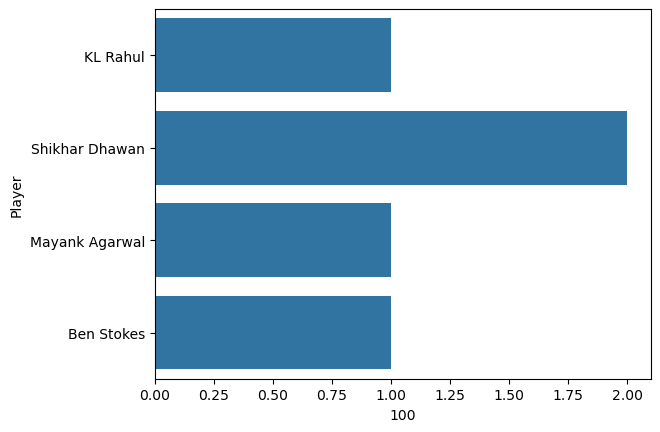

In [20]:
a=df[df["100"]>=1]
a
sns.barplot(data=a,x="100",y="Player")

## Q11. Players who scored atleast 4 half centuries in this season.

In [21]:
four_half=df[df["50"]>=4]
four_half[["Player","50"]]

,Player,50
0,KL Rahul,5
1,Shikhar Dhawan,4
2,David Warner,4
4,Ishan Kishan,4
5,Quinton Kock,4
6,Suryakumar Yadav,4
7,Devdutt Padikkal,5
9,ABD Villiers,5
10,Faf Duplessis,4


## Q12. Check the list of players who hit more than 45 boundaries and more than 10 sixes in this season.

In [22]:
more_than=df[(df["4s"]>45) & (df["6s"]>10)]
more_than[["Player","4s","6s"]]

,Player,4s,6s
0,KL Rahul,58,23
1,Shikhar Dhawan,67,12
2,David Warner,52,14
5,Quinton Kock,46,22
6,Suryakumar Yadav,61,11


## Q13. Plot a histogram of number of matches played in a season by players.

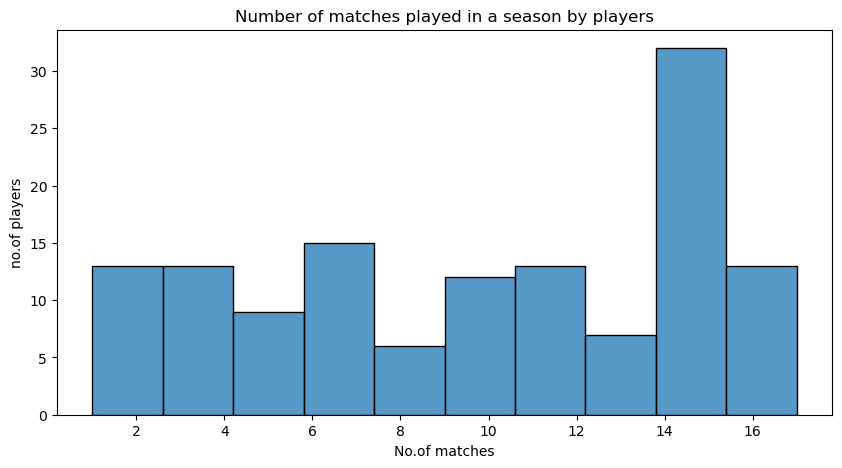

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(data=df["Matches"],bins=10)
plt.title("Number of matches played in a season by players")
plt.xlabel("No.of matches")
plt.ylabel("no.of players")
plt.show()

## Q14. Plot the histogram of balls faced by players.


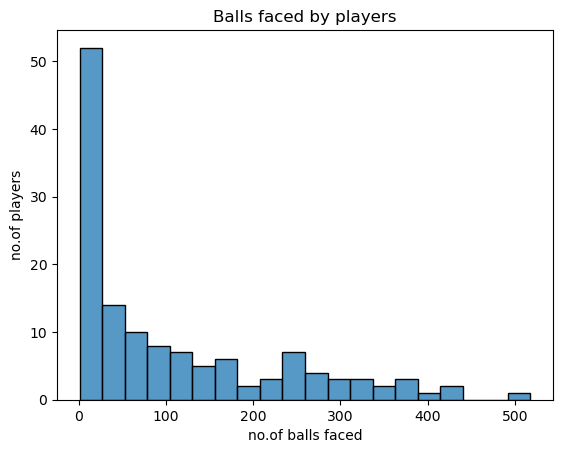

In [24]:
sns.histplot(data=df["Balls faced"],bins=20)
plt.xlabel("no.of balls faced")
plt.ylabel("no.of players")
plt.title("Balls faced by players")
plt.show()

## Q15. Top 10 players with most runs in a season.

In [25]:
df[["Player","Runs"]].sort_values(by="Runs",ascending=False).head(10)

,Player,Runs
0,KL Rahul,670
1,Shikhar Dhawan,618
2,David Warner,548
3,Shreyas Iyer,519
4,Ishan Kishan,516
5,Quinton Kock,503
6,Suryakumar Yadav,480
7,Devdutt Padikkal,473
8,Virat Kohli,466
9,ABD Villiers,454


## Q16. Print the players who played the match but didn't get the batting.

In [66]:
no_batting=df[(df["Matches"]>0) & (df["Inns"]==0)]
no_batting[["Player","Matches","Inns"]]

,Player,Matches,Inns


In [ ]:
# There is no player who played the match but didn't get the batting

## Q17. Create a new column to show the percentage of total runs scored in 4s and 6s. Then print the top 5 players with maximum percentage.


In [33]:
df["(4s+6s)%"]=(df["4s"]*4+df["6s"]*6)/df["Runs"]*100
df[["Player","(4s+6s)%"]].sort_values(by="(4s+6s)%",ascending=False).reset_index().head()


,index,Player,(4s+6s)%
0,109,Andrew Tye,100.000000
1,48,Andre Russell,76.923077
2,74,Chris Morris,76.470588
3,29,Hardik Pandya,73.309609
4,47,Sunil Narine,72.727273


## Q18. Print the players with top 5 Not out percentages (Not Out percentage can be calculated as number of Not outs divided by Innings).

In [40]:
df["NotOut%"]=df["Not Out"]/df["Inns"]*100
df[["Player","Inns","Not Out","NotOut%"]].sort_values(by="NotOut%",ascending=False).head(5)

,Player,Inns,Not Out,NotOut%
122,Shahbaz Ahmed,1,1,100.0
97,Mohammad Nabi,1,1,100.0
114,T Natarajan,3,3,100.0
116,Rahul Chahar,1,1,100.0
113,Dhawal Kulkarni,1,1,100.0


## Q19. Create visualization of top 10 players with highest number of sixes.

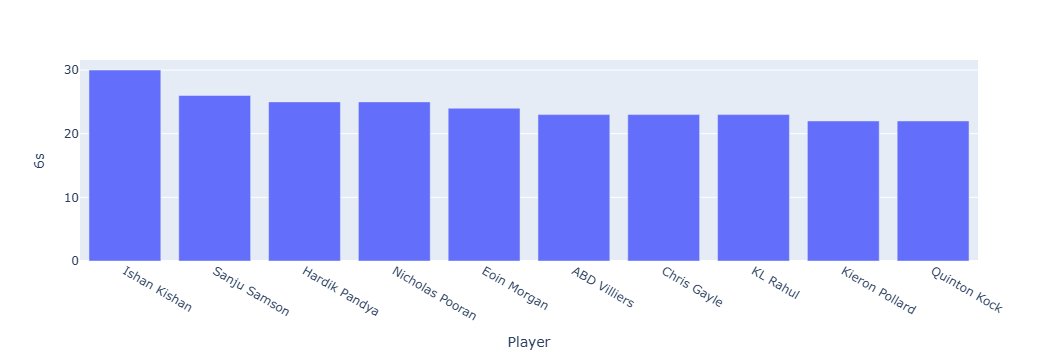

In [80]:
six=df.sort_values(by="6s",ascending=False).head(10)
px.bar(six,x="Player",y="6s")


## Q20. Scatter plot of runs scored by a player v/s balls faced in a season. Then find the relationship between these 2 variables.

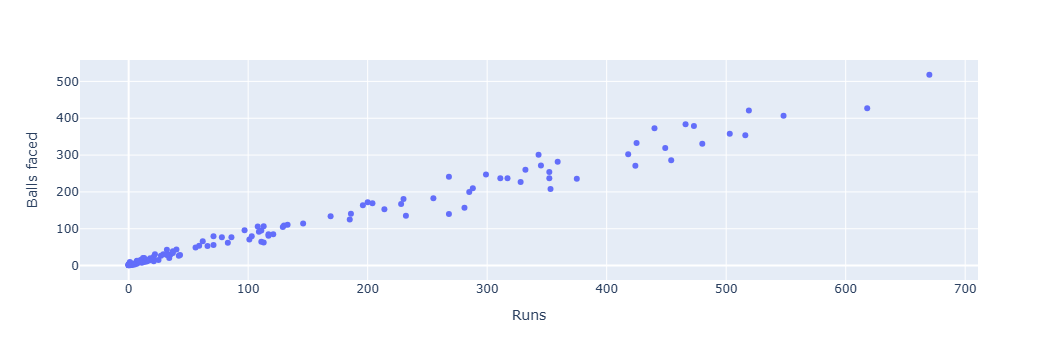

In [88]:
px.scatter(df,x="Runs",y="Balls faced",hover_data="Player")

In [94]:
correlation=df["Runs"].corr(df["Balls faced"]).round(4)
print("Relation b/w Runs and Balls faced :",correlation)

Relation b/w Runs and Balls faced : 0.9899


In [95]:
# Therefore it is strongly positively correlated.That is players who faced more balls tend to score more runs.